In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### First we need to get a brief on the shape of the data, i.e. the columns and what they represent. Check if cleaning is needed or not and proceed accordingly.

In [29]:
#loading the data
data = pd.read_csv('assets/cities.csv')
stats = data.describe()
print(data.shape)
print(stats)

(493, 18)
       state_code   dist_code  population_total  population_male  \
count  493.000000  493.000000      4.930000e+02     4.930000e+02   
mean    18.643002   16.782961      4.481124e+05     2.343468e+05   
std      9.297168   15.566131      1.033228e+06     5.487786e+05   
min      1.000000    1.000000      1.000360e+05     5.020100e+04   
25%      9.000000    7.000000      1.261420e+05     6.638400e+04   
50%     19.000000   13.000000      1.841330e+05     9.665500e+04   
75%     27.000000   21.000000      3.490330e+05     1.750550e+05   
max     35.000000   99.000000      1.247845e+07     6.736815e+06   

       population_female  0-6_population_total  0-6_population_male  \
count       4.930000e+02          4.930000e+02           493.000000   
mean        2.137656e+05          4.709285e+04         24849.527383   
std         4.848622e+05          1.050279e+05         55535.310272   
min         4.512600e+04          6.547000e+03          3406.000000   
25%         6.041100e+

### Now it's time to get an idea on the individual colums and perform some of the operations like

- Checking for null values.
- Checking for data types.
- Checking for unique values.
- Checking for the distribution of the data.
- Checking individual column counts.

In [30]:
# Involved features in the dataset
features = data.columns
print(features)

Index(['name_of_city', 'state_code', 'state_name', 'dist_code',
       'population_total', 'population_male', 'population_female',
       '0-6_population_total', '0-6_population_male', '0-6_population_female',
       'literates_total', 'literates_male', 'literates_female',
       'child_sex_ratio', 'location', 'total_graduates', 'male_graduates',
       'female_graduates'],
      dtype='object')


In [31]:
for feature in features:
    print(f'{feature} : {data[feature].dtype}')

name_of_city : object
state_code : int64
state_name : object
dist_code : int64
population_total : int64
population_male : int64
population_female : int64
0-6_population_total : int64
0-6_population_male : int64
0-6_population_female : int64
literates_total : int64
literates_male : int64
literates_female : int64
child_sex_ratio : int64
location : object
total_graduates : int64
male_graduates : int64
female_graduates : int64


In [32]:
for feature in features:
    print(f'{feature} : {data[feature].isnull().sum()}')
# the data has no null values so any extra processing for removin null values is not needed

name_of_city : 0
state_code : 0
state_name : 0
dist_code : 0
population_total : 0
population_male : 0
population_female : 0
0-6_population_total : 0
0-6_population_male : 0
0-6_population_female : 0
literates_total : 0
literates_male : 0
literates_female : 0
child_sex_ratio : 0
location : 0
total_graduates : 0
male_graduates : 0
female_graduates : 0


In [33]:
#Checked for unique values in each feature (although this is not very much required)
for feature in features:
    print(f'{feature} : {data[feature].nunique()}')

name_of_city : 492
state_code : 29
state_name : 29
dist_code : 61
population_total : 493
population_male : 493
population_female : 493
0-6_population_total : 491
0-6_population_male : 489
0-6_population_female : 480
literates_total : 492
literates_male : 493
literates_female : 490
child_sex_ratio : 179
location : 490
total_graduates : 489
male_graduates : 485
female_graduates : 486


In [34]:
# do value counts for each feature
for feature in features:
    print(f'{feature} : {data[feature].value_counts()}')

name_of_city : name_of_city
Aurangabad         2
Abohar             1
Muzaffarpur        1
Nanded Waghala     1
Nalgonda           1
                  ..
Etah               1
Erode              1
English Bazar      1
Eluru              1
Yavatmal           1
Name: count, Length: 492, dtype: int64
state_code : state_code
9     63
19    61
27    43
28    42
23    32
33    32
24    29
8     29
10    26
29    26
6     20
3     16
7     15
21    10
20    10
22     9
32     7
5      6
18     4
1      3
34     2
14     1
17     1
35     1
4      1
13     1
16     1
15     1
2      1
Name: count, dtype: int64
state_name : state_name
UTTAR PRADESH                63
WEST BENGAL                  61
MAHARASHTRA                  43
ANDHRA PRADESH               42
MADHYA PRADESH               32
TAMIL NADU                   32
GUJARAT                      29
RAJASTHAN                    29
BIHAR                        26
KARNATAKA                    26
HARYANA                      20
PUNJAB         

#   Section A
1. Create a subset for your data frame and drop the column ‘child_sex_ratio’ and 
display the data. 
2. Display all the column headings together. 
3. Sort the data in an alphabetical order w.r.t. the column ‘state_name’. 
4. Calculate ‘sex ratio’ for each row and add it as a new column.

### Ans. Explanation for the process below:
- First we have created a subset from the original data frame where hte column 'child' has been excluded.
- The the new feature list has been displayed.
- The data then has been sorted in alphabetical order w.r.t. the column 'state_name'.
- Finally we have calculated the sex ratio for each row and added them as colum.

In [60]:
#1.
subset = data.drop(columns=['child_sex_ratio'])

#2. Display all the column headings together
subset.head()
print("New Feature List:\n")
a = 1
for feature in subset.columns:
    print(a,". ",feature)
    a += 1

#3. Sort the data in an alphabetical order w.r.t. the column ‘state_name’

subset_sorted = subset.sort_values(by='state_name') #data is now sorted in alphabetical order w.r.t. the column ‘state_name’

#4. Calculate sex ratio for each row and add it as a new column
subset_sorted['sex_ratio'] = subset_sorted['population_female'] / subset_sorted['population_male']
subset_sorted.head()

New Feature List:

1 .  name_of_city
2 .  state_code
3 .  state_name
4 .  dist_code
5 .  population_total
6 .  population_male
7 .  population_female
8 .  0-6_population_total
9 .  0-6_population_male
10 .  0-6_population_female
11 .  literates_total
12 .  literates_male
13 .  literates_female
14 .  location
15 .  total_graduates
16 .  male_graduates
17 .  female_graduates


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,literates_total,literates_male,literates_female,location,total_graduates,male_graduates,female_graduates,sex_ratio
376,Port Blair,35,ANDAMAN & NICOBAR ISLANDS,3,100608,53247,47361,9358,4852,4506,81908,44908,37000,"11.6233774,92.7264828",12420,6717,5703,0.889459
444,Srikakulam,28,ANDHRA PRADESH,11,126003,62583,63420,11001,5686,5315,97904,52029,45875,"18.4285005,84.0167423",21745,14125,7620,1.013374
29,Anantapur,28,ANDHRA PRADESH,22,262340,131506,130834,23630,12409,11221,195452,105452,90000,"14.6818877,77.6005911",43700,27392,16308,0.994890
339,Nandyal,28,ANDHRA PRADESH,21,200746,100770,99976,20588,10723,9865,138525,75749,62776,"15.4785694,78.4830934",22411,14540,7871,0.992121
210,Hindupur,28,ANDHRA PRADESH,22,151835,76625,75210,16309,8263,8046,103538,56177,47361,"13.8185378,77.4988753",11050,6926,4124,0.981533


# Section B
1. Provide a Bar Plot for ‘state_name’ vs ’literates_total’, such that the states names do 
not overlap and label both x and y axes. Provide a suitable title for the plot. 
2. Calculate the ‘effective literacy rate’. Utilize the data to perform a scatter plot 
between total graduate vs effective literacy rate. Provide all the necessary labels & 
title. 
[Effective literacy rate= (total literates/total population) X100] 
3. Provide a KDE plot for ‘literates_total’ taking ‘state_name’ as hue. Provide a 
necessary title. 
4. How can you visualize the relationship between total population and effective literacy 
rate, while also representing the number of total graduates with bubble sizes in a 
scatter plot using Matplotlib?

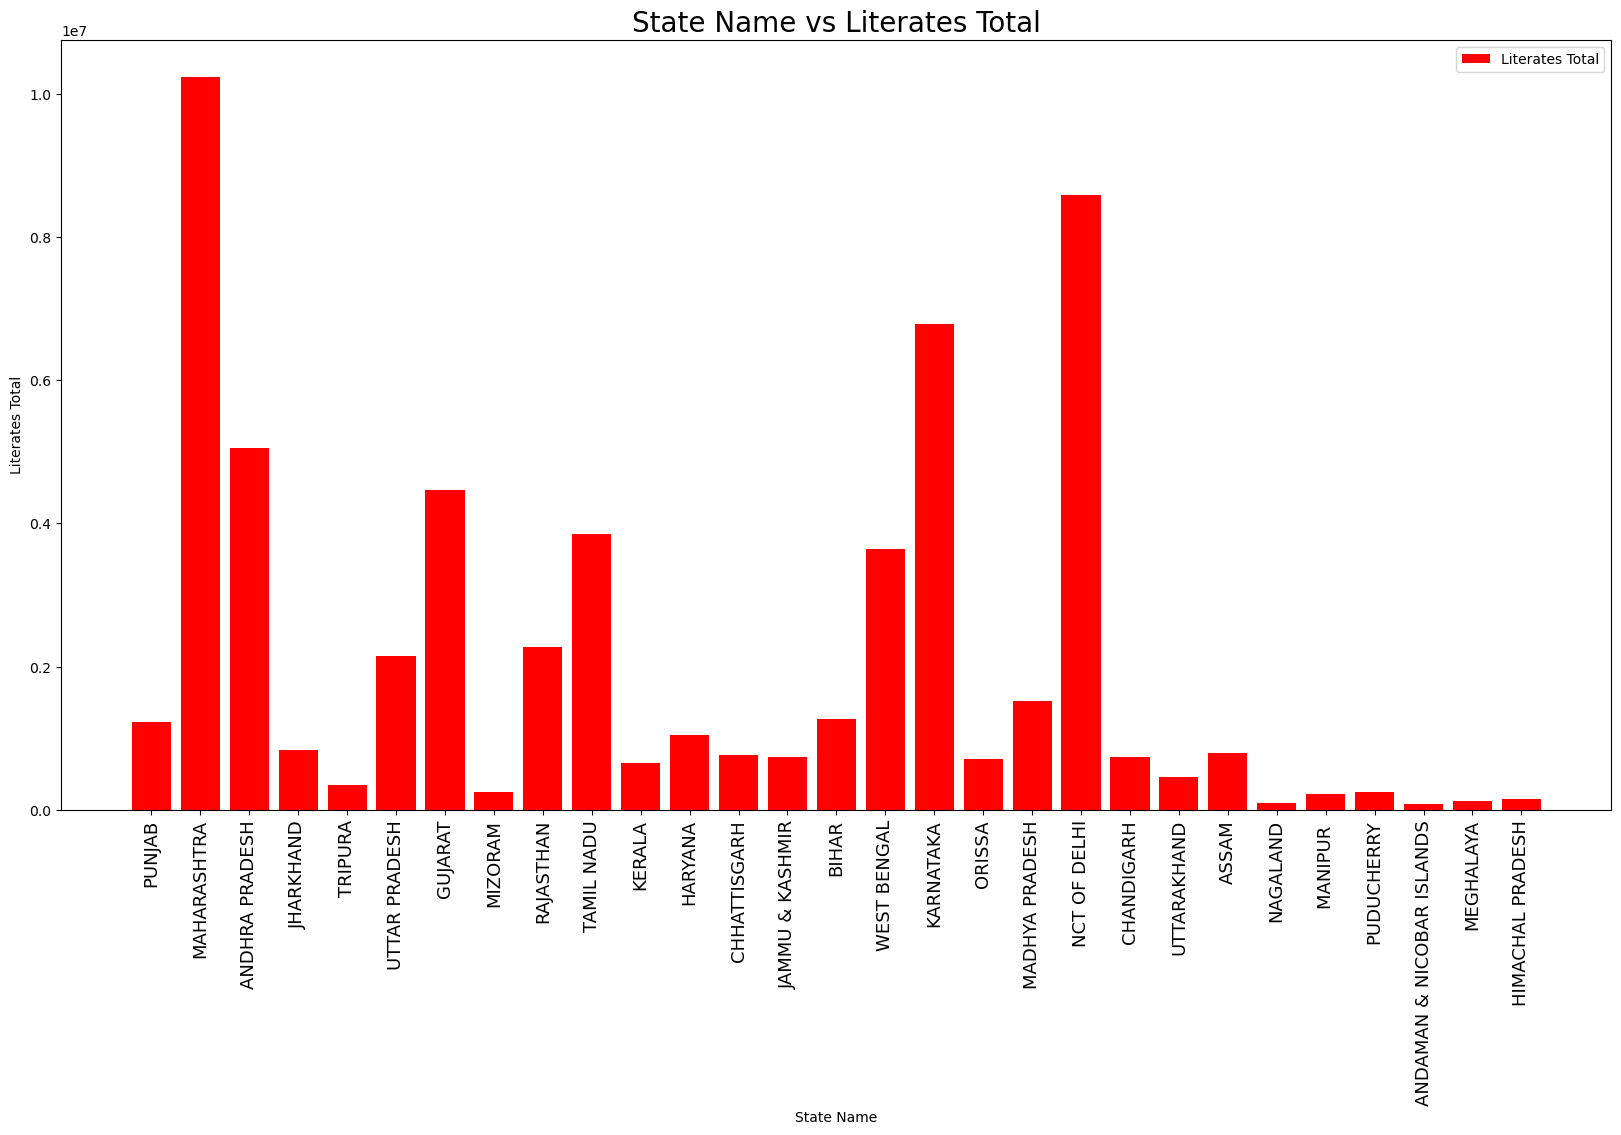

In [61]:
# 1. Provide a Bar Plot for ‘state_name’ vs ’literates_total’, such that the states names do not overlap and label both x and y axes. Provide a suitable title for the plot.
state_name = data['state_name']
literates_total = data['literates_total']

plt.figure(figsize=(20,10))
plt.bar(state_name,literates_total,color='red')
plt.xticks(rotation=90, fontsize=13) # to avoid overlapping of state names
plt.xlabel('State Name')
plt.ylabel('Literates Total')
plt.title('State Name vs Literates Total',fontsize=20)
#legend
plt.legend(['Literates Total'])
plt.show()


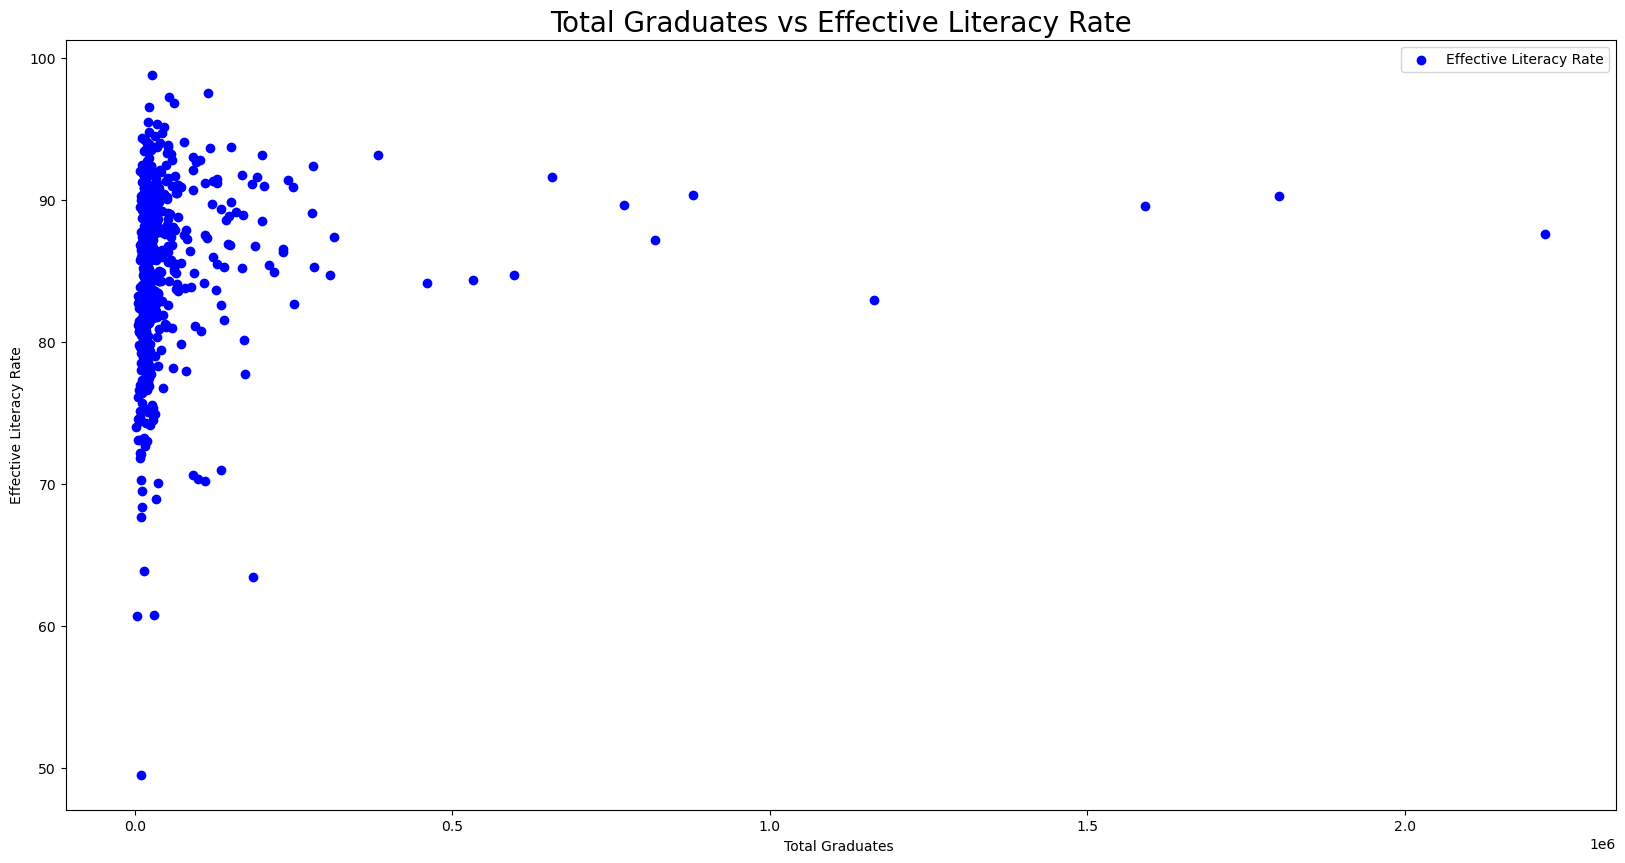

49.508433348480395
98.7973117755917
2532
2221137
MAHARASHTRA


In [89]:
# 2. Calculate the ‘effective literacy rate’. Utilize the data to perform a scatter plot between total graduate vs effective literacy rate. Provide all the necessary labels & title. 

effective_literacy_rate = (data['literates_total'] / (data['population_total'] - data['0-6_population_total'])) * 100

plt.figure(figsize=(20,10))
plt.scatter(data['total_graduates'],effective_literacy_rate,color='blue')
plt.xlabel('Total Graduates ')
plt.ylabel('Effective Literacy Rate')
plt.title('Total Graduates vs Effective Literacy Rate',fontsize=20)
plt.legend(['Effective Literacy Rate'])
plt.show()

print(effective_literacy_rate.min())
print(effective_literacy_rate.max())
print(data['total_graduates'].min())
print(data['total_graduates'].max())
# print index of max literacy rate
idx = data['literates_total'].idxmax()
#get the state at this index
state = data['state_name'][idx]
print(state)

C:\Users\User\AppData\Local\Temp\ipykernel_23856\2912658782.py:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='literates_total', hue='state_name', fill=False, common_norm=False, palette='tab10', alpha=0.7, linewidth=3)


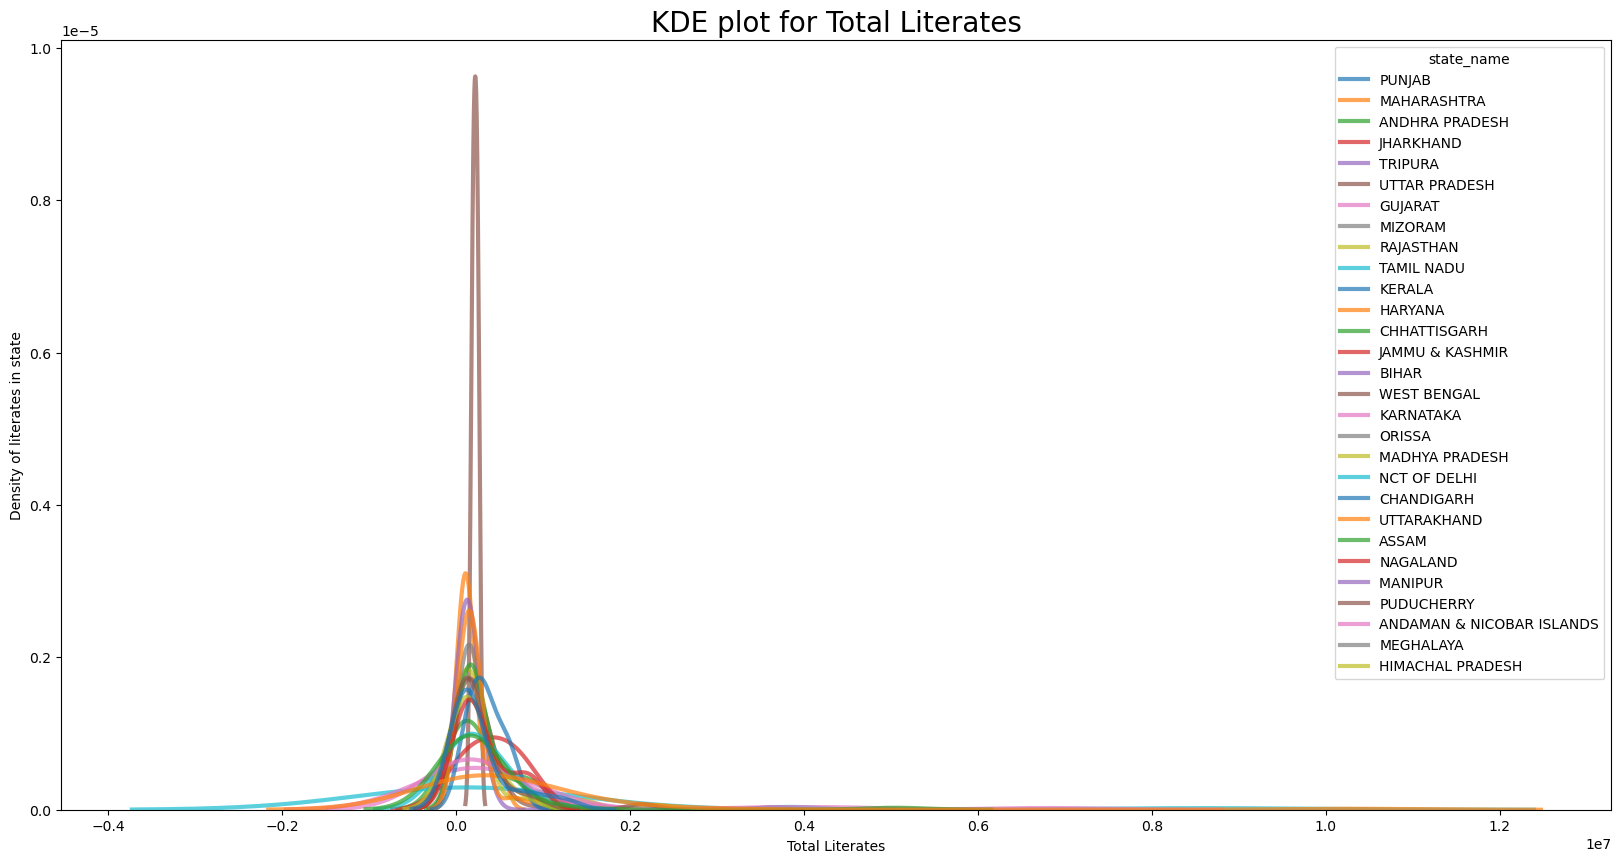

In [84]:
# 3. Provide a KDE plot for ‘literates_total’ taking ‘state_name’ as hue. Provide a necessary title. 
plt.figure(figsize=(20,10))
sns.kdeplot(data=data, x='literates_total', hue='state_name', fill=False, common_norm=False, palette='tab10', alpha=0.7, linewidth=3)
plt.title('KDE plot for Total Literates',fontsize=20)
plt.xlabel('Total Literates')
plt.ylabel('Density of literates in state')
plt.show()

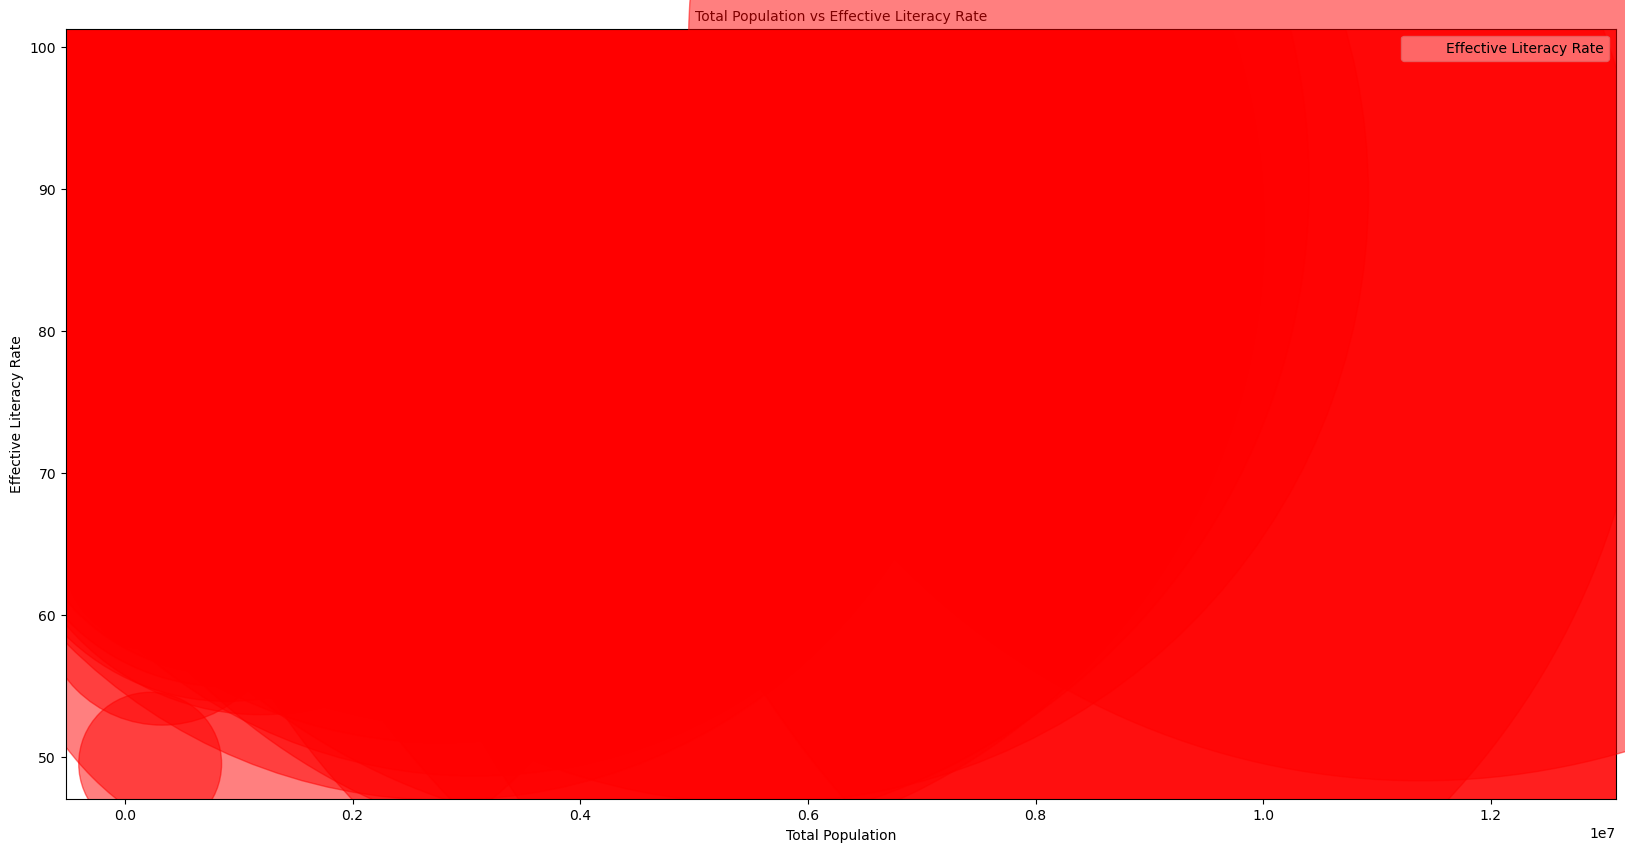

In [90]:
#4. How can you visualize the relationship between total population and effective literacy rate, while also representing the number of total graduates with bubble sizes in a scatter plot using Matplotlib?
plt.figure(figsize=(20,10))
plt.scatter(data['population_total'],effective_literacy_rate,s=data['total_graduates'],c='red',alpha=0.5)
plt.xlabel('Total Population')
plt.ylabel('Effective Literacy Rate')
plt.title('Total Population vs Effective Literacy Rate',fontsize=10)
plt.legend(['Effective Literacy Rate'])
plt.show()

#  IDK this ain't working out 😭😭😭😭😭, tf is that plot.


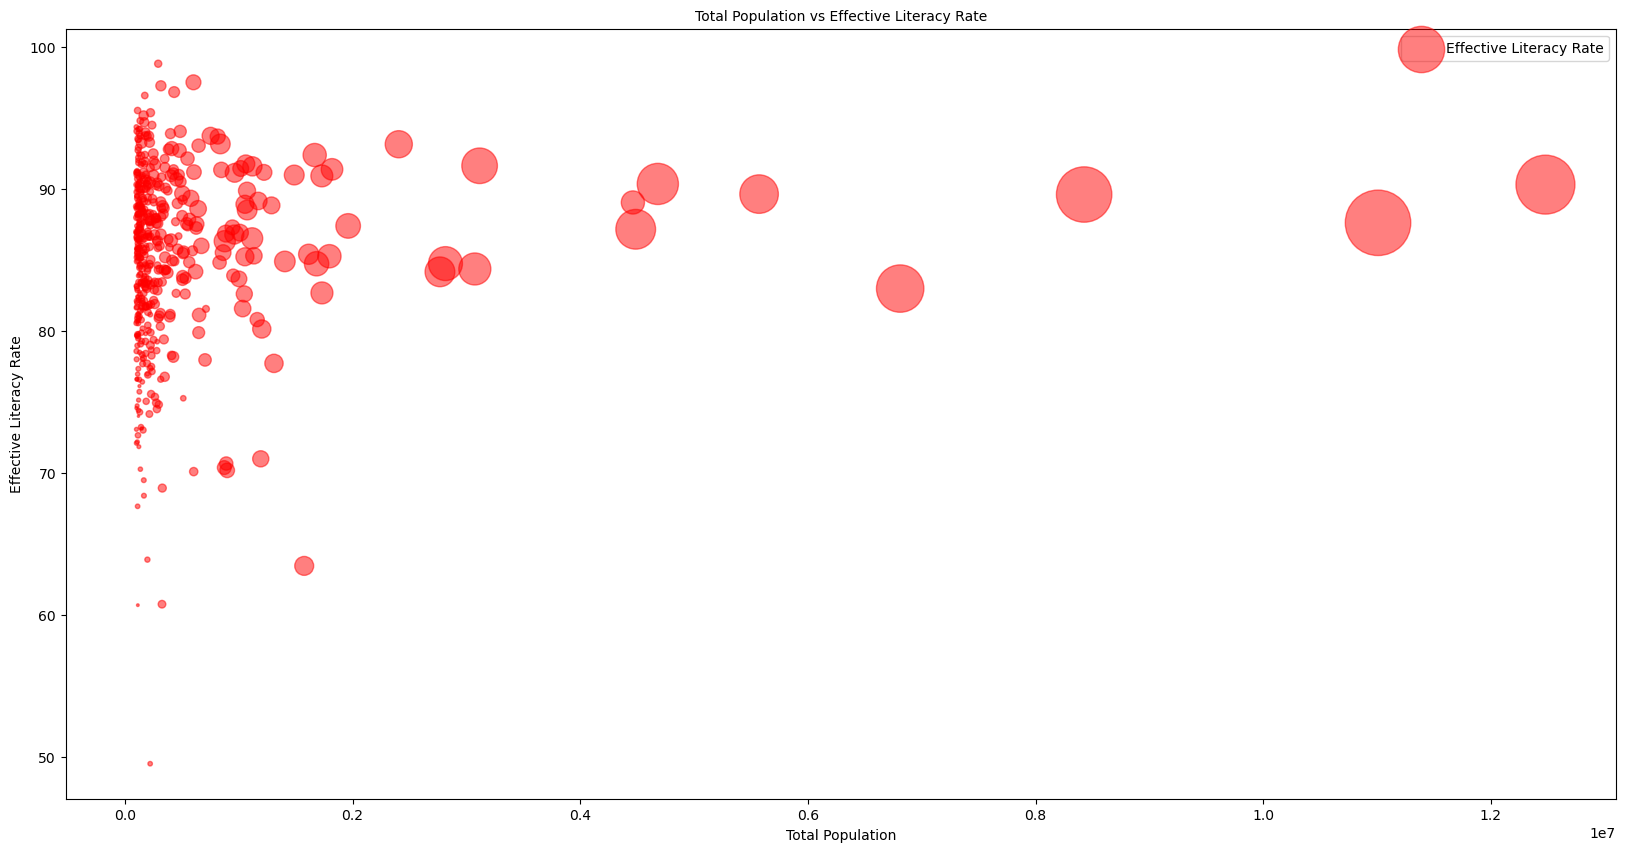

In [91]:
plt.figure(figsize=(20,10))
plt.scatter(data['population_total'], effective_literacy_rate, s=data['total_graduates'] / 1000, c='red', alpha=0.5)
#represented total graduates per 1000 people to make the bubble size smaller
plt.xlabel('Total Population')
plt.ylabel('Effective Literacy Rate')
plt.title('Total Population vs Effective Literacy Rate', fontsize=10)
plt.legend(['Effective Literacy Rate'])
plt.show()

# Section C
1. Create a dashboard for all the aforesaid plots. 
2. Calculate the population ratio of male vs female in each state. Utilize the data to 
prepare a heatmap using top 10 states (according to population).

C:\Users\User\AppData\Local\Temp\ipykernel_23856\3925649983.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(data['state_name'], rotation=90)
C:\Users\User\AppData\Local\Temp\ipykernel_23856\3925649983.py:18: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=data, x='literates_total', hue='state_name', fill=False, common_norm=False, palette='tab10', alpha=0.7, linewidth=3, ax=axs[1, 0])


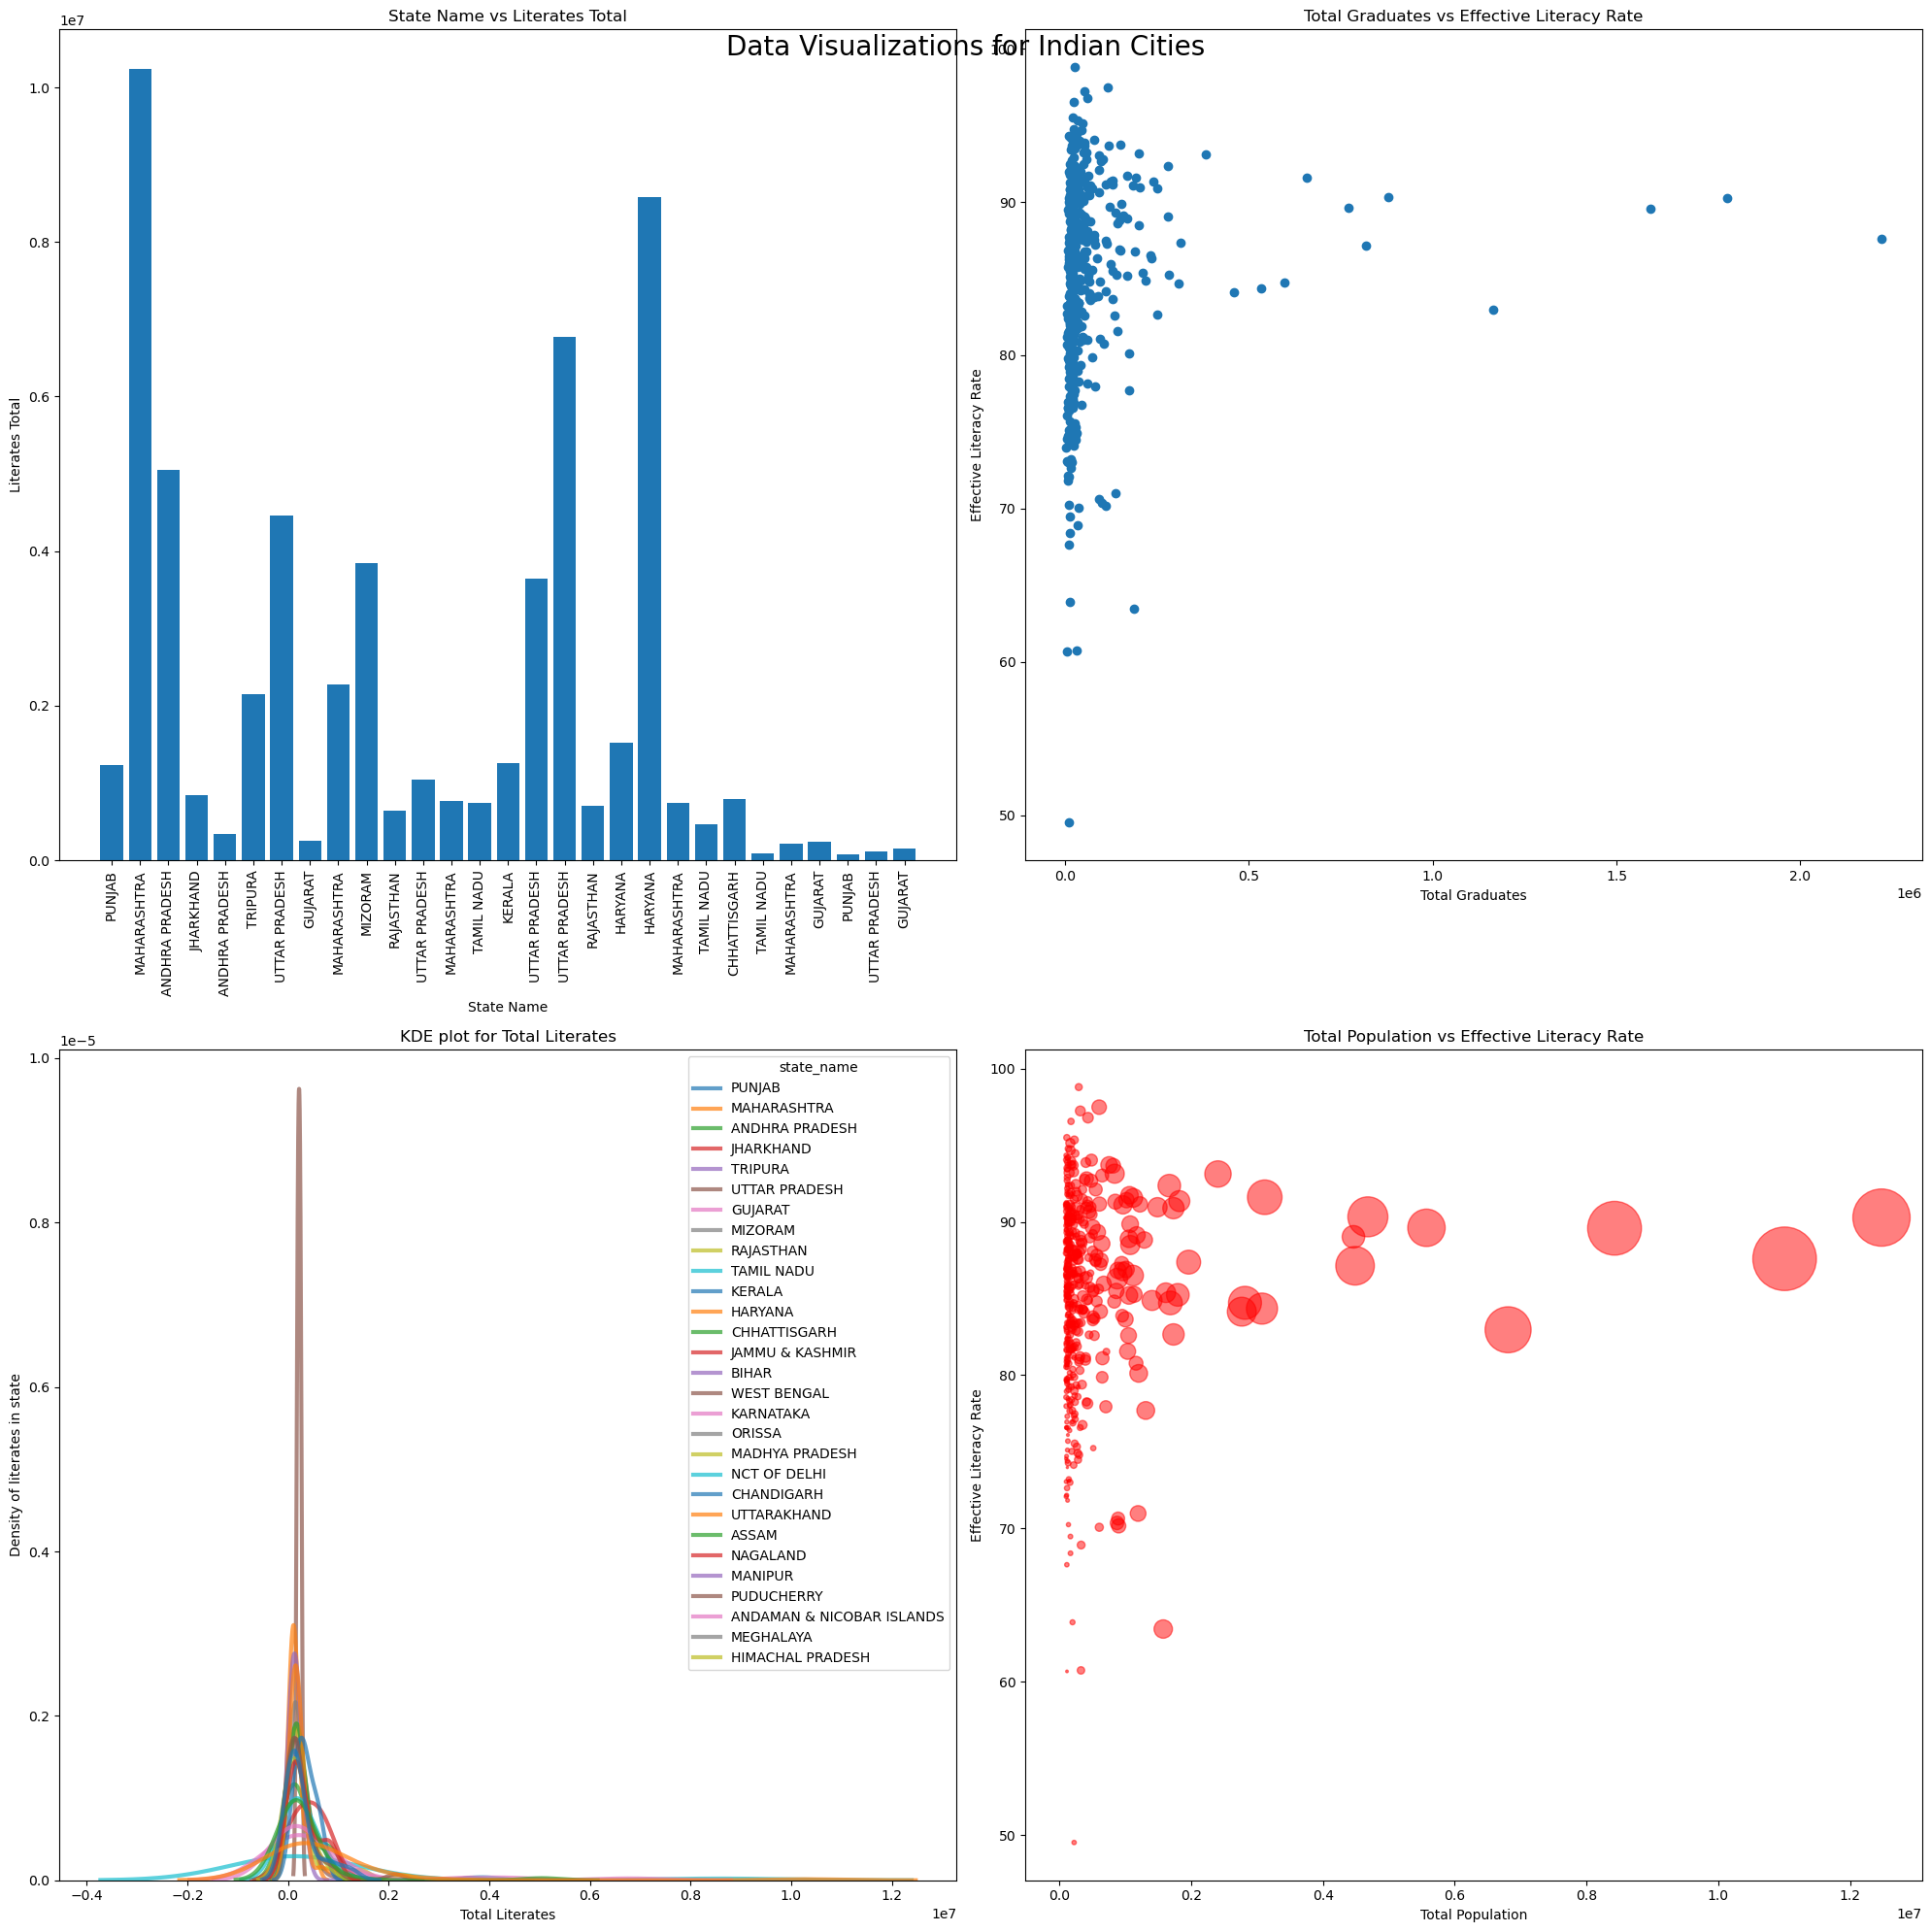

In [93]:
# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

# Plot 1: Bar Plot for ‘state_name’ vs ’literates_total’
axs[0, 0].bar(data['state_name'], data['literates_total'])
axs[0, 0].set_xticklabels(data['state_name'], rotation=90)
axs[0, 0].set_xlabel('State Name')
axs[0, 0].set_ylabel('Literates Total')
axs[0, 0].set_title('State Name vs Literates Total')

# Plot 2: Scatter Plot between total graduate vs effective literacy rate
axs[0, 1].scatter(data['total_graduates'], effective_literacy_rate)
axs[0, 1].set_xlabel('Total Graduates')
axs[0, 1].set_ylabel('Effective Literacy Rate')
axs[0, 1].set_title('Total Graduates vs Effective Literacy Rate')

# Plot 3: KDE plot for ‘literates_total’ taking ‘state_name’ as hue
sns.kdeplot(data=data, x='literates_total', hue='state_name', fill=False, common_norm=False, palette='tab10', alpha=0.7, linewidth=3, ax=axs[1, 0])
axs[1, 0].set_xlabel('Total Literates')
axs[1, 0].set_ylabel('Density of literates in state')
axs[1, 0].set_title('KDE plot for Total Literates')

# Plot 4: Scatter Plot between total population and effective literacy rate with bubble sizes representing the number of total graduates
axs[1, 1].scatter(data['population_total'], effective_literacy_rate, s=data['total_graduates'] / 1000, c='red', alpha=0.5)
axs[1, 1].set_xlabel('Total Population')
axs[1, 1].set_ylabel('Effective Literacy Rate')
axs[1, 1].set_title('Total Population vs Effective Literacy Rate')

# Adjust the spacing between subplots
plt.tight_layout()

fig.suptitle('Data Visualizations for Indian Cities', fontsize=20)
# Show the dashboard
plt.show()

In [135]:
state_population  = data.groupby('state_name').agg({'population_male':'sum','population_female':'sum'})
state_population.head()
# state_population = state_population.reset_index() <- joining the two is causing some problems in plotting so i let it be
state_population['total_population'] = state_population['population_male'] + state_population['population_female']
#make a new column id for the first col
state_population.head()

,population_male,population_female,total_population
state_name,,,
ANDAMAN & NICOBAR ISLANDS,53247,47361,100608
ANDHRA PRADESH,9192368,8979247,18171615
ASSAM,720132,671022,1391154
BIHAR,3558722,3155794,6714516
CHANDIGARH,525226,435561,960787


In [136]:
state_pop_sorted = state_population.sort_values(by='total_population',ascending=False)
state_pop_sorted.head()

,population_male,population_female,total_population
state_name,,,
MAHARASHTRA,19961736,17760400,37722136
UTTAR PRADESH,13433369,11869556,25302925
ANDHRA PRADESH,9192368,8979247,18171615
WEST BENGAL,9357777,8705732,18063509
GUJARAT,9541688,8293361,17835049


In [137]:
# top 10 most populated states male vs female

mvf = state_pop_sorted.head(10)
mvf

,population_male,population_female,total_population
state_name,,,
MAHARASHTRA,19961736,17760400,37722136
UTTAR PRADESH,13433369,11869556,25302925
ANDHRA PRADESH,9192368,8979247,18171615
WEST BENGAL,9357777,8705732,18063509
GUJARAT,9541688,8293361,17835049
KARNATAKA,8112840,7687056,15799896
TAMIL NADU,6957261,6922134,13879395
NCT OF DELHI,7201322,6280675,13481997
MADHYA PRADESH,5761143,5261948,11023091


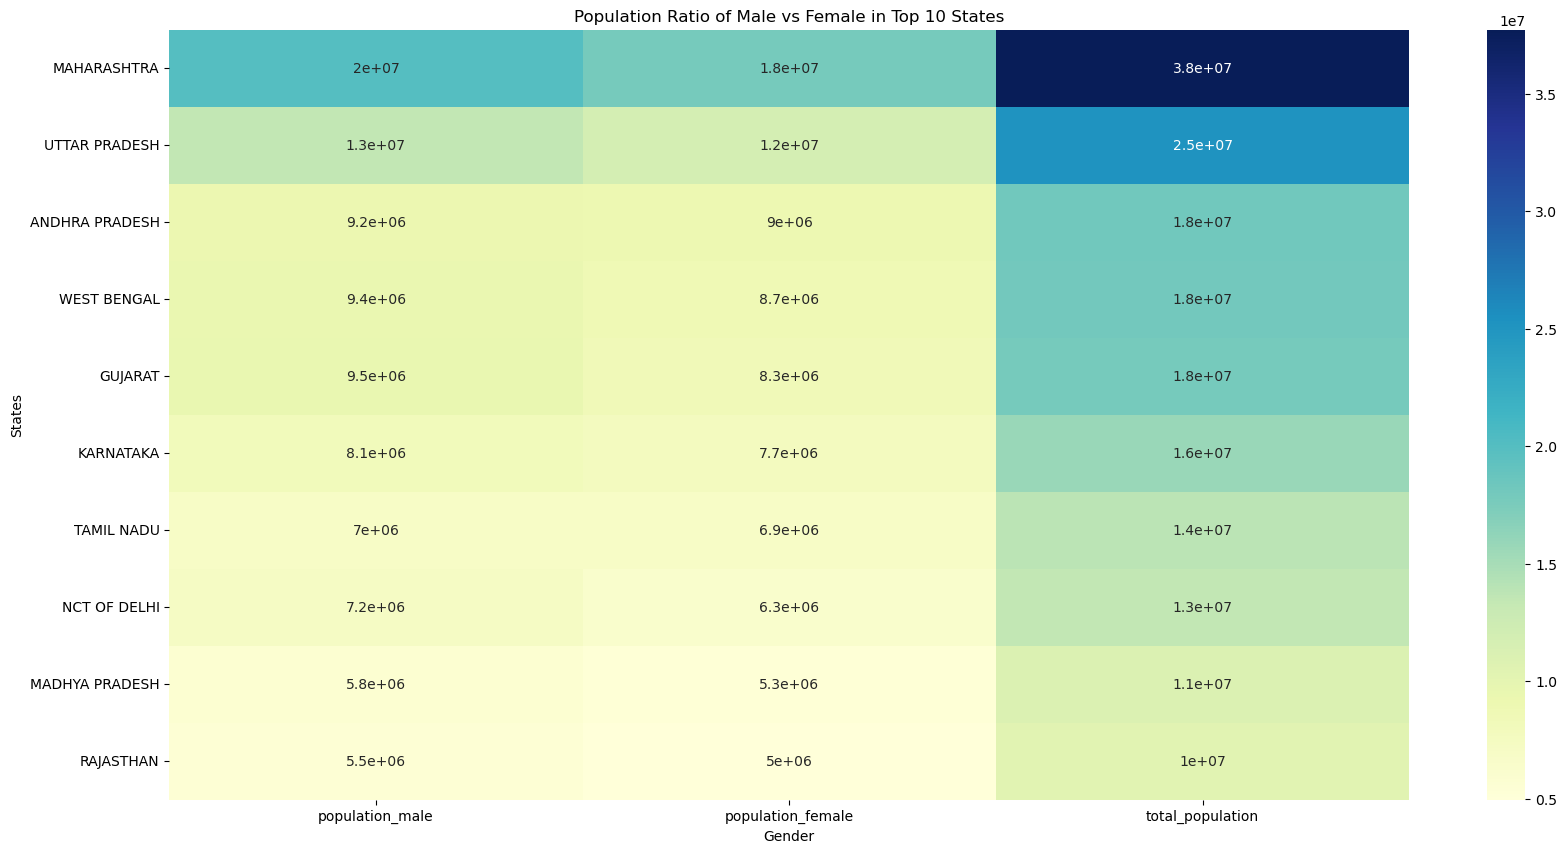

In [138]:
#create a heatmap to visualize the data mvf
plt.figure(figsize=(20,10))
sns.heatmap(mvf[['population_male', 'population_female', 'total_population']], annot=True, cmap='YlGnBu')
plt.title('Population Ratio of Male vs Female in Top 10 States')
plt.xlabel('Gender')
plt.ylabel('States')
plt.show()